##MNIST Handwritten Digits Classification, Manual Approach

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

The database is widely used for training and testing in the field of machine learning. MNIST provides a baseline for testing image processing systems. You could consider it as the “hello world” of machine learning. Data scientists will train an algorithm on the MNIST dataset simply to test a new architecture or framework, to ensure that they work.

MNIST is a labeled dataset that pairs images of hand-written numerals with the name of the respective numeral, so it can be used in supervised learning to train classifiers. The MNIST database contains 60,000 training images and 10,000 testing images. We will be working with the **training set** for both approaches. 

https://colah.github.io/posts/2014-10-Visualizing-MNIST/

---



Import the necessary libraries and load the MNIST training data from the csv file from the Lab 6 D2L Assignment. To load it in, you must load it into Colab. Go to the left side menu and click on the file icon. Click on the paper with an arrow (upload button) and upload the mnist_train.csv file. (It does not need to go under sample_data.) It may take a second to load all the data in. The shape should be (60000, 785). 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Import CSV with training data and return a DataFrame data_pd
data_pd = pd.read_csv('mnist_train.csv')

# Print the shape of the DataFrame
print(data_pd.shape)

(60000, 785)


Print the first five rows of data_pd. This is a pandas DataFrame, so you will use a pandas function to do this. Note that you will use a member function, or a function that belongs to the DataFrame class, so you will not use pd.function_name(), you will use data_pd.function_name(). 

In [3]:
# Add your code here
data_pd.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Display the count, mean, std, min, 25% through 75% and max of the data by using another DataFrame function that *describes* (hint) data_pd. We want to look at these basic statistical insights of the numerical features of the data.

In [4]:
# Add your code here
data_pd.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


###Data Cleaning and Normalization

We need to check if there is any NA values in the data. Use another DataFrame function to check if there is any NA values in data_pd. *Stack Overflow might be helpful for this.*

In [31]:
# Add your code here
data_pd.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

Now we need to divide the data into the input and output features to train the model.

In [6]:
# Set the label and the feature columns
mnist_train_data = data_pd.loc[:, "1x1":]
mnist_train_label = data_pd.loc[:, "label"]

Now we need to normalize the data. Remember that this is image data, and that there is a maximum value of 255 for each pixel in an image. We are going to normalize the images array to be in the range of 0-1 by dividing them by the max possible value. Reassign mnist_train_data to the training data divided by the number of pixels in the image. This process will normalize the data. 

In [8]:
# Add your code here
mnist_train_data = mnist_train_data / 255.0

###Visualizing a Single Digit With an Array

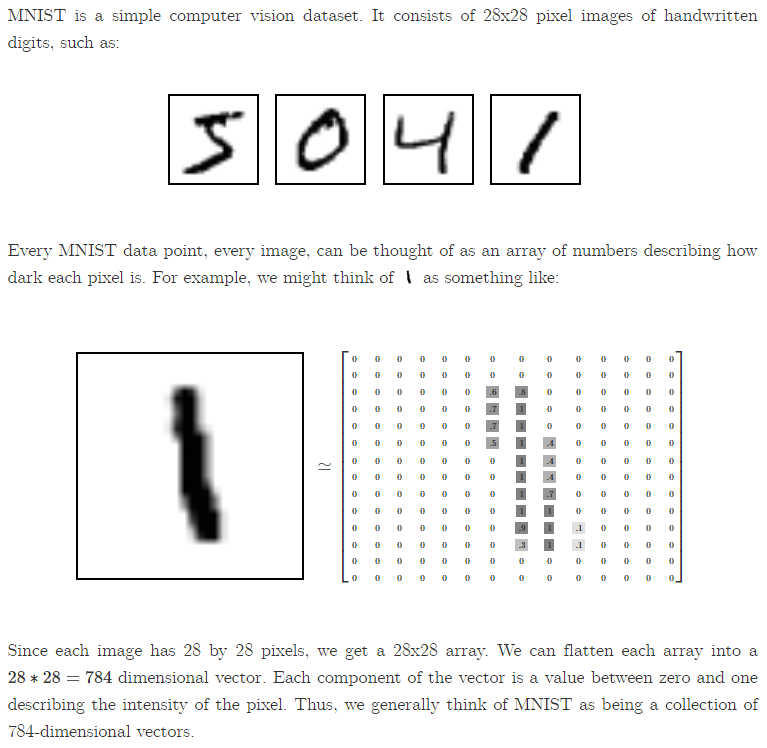

Below we are going to print out one of the images in the data set for you to get an idea of what the data actually represents. 

IMAGE LABEL: 1


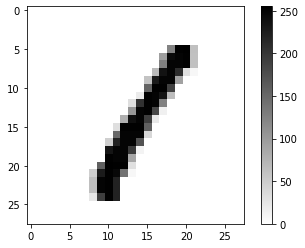

In [7]:
digit_array = data_pd.loc[3, "1x1":]
arr = np.array(digit_array) 

# Reshape the image 
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(data_pd.loc[3, "label"]))

###PCA Implementation on MNIST Digits (Manual Approach)

###Standardize Data
First we need to standardize the data before we can perform calculations on it. Use the fit_transform() function to standardize the training data we have been working with. 

In [10]:
from sklearn.preprocessing import StandardScaler

standardized_scalar = StandardScaler()
# Add one line of code here 
standardized_data = standardized_scalar.fit_transform(mnist_train_data)

standardized_data.shape

(60000, 784)

###Calculate Covariance Matrix
Now, create the covariance matrix from the training data and standardized data. Refer to the iris example in Demo 5 to do this. 

In [13]:
# Add your code here
cov_matrix = 1/(len(mnist_train_data)-1) * standardized_data.T @ standardized_data

cov_matrix.shape

(784, 784)

###Calculate Eigenvalues and Eigenvectors

We are going to use the eigh function from scipy to calculate the eigenvectors. This is because we want to set the parameter eigvals to a tuple representing the specific eigenvalues and corresponding eigenvectors we want returned. 

From the scipy.linalg.eigh documentation: 

eigvals : tuple (lo, hi), optional

> Indexes of the smallest and largest (in ascending order) eigenvalues and corresponding eigenvectors to be returned: 0 <= lo <= hi <= M-1. If omitted, all eigenvalues and eigenvectors are returned.

Calculate and print the eigenvalues and eigenvectors using numpy like in Demo 5. Then calculate the eigenvalues and eigenvectors sending in both the covariance matrix and eigvals=(782,783) using scipy's eigh function. 

In [25]:
# Add Numpy eigenvalues/eigenvectors calculation here
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Using numpy: Eigen values - ", eigenvalues, " Eigen vectors - ", eigenvectors)

from scipy.linalg import eigh
# Add Scipy eigenvalues/eigenvectors calculation here
values, vectors = eigh(cov_matrix, eigvals=(782,783))
print("Using scipy's eigh function: Eigen values - ", values, " Eigen vectors - ", vectors)

Using numpy: Eigen values -  [ 4.04876351e+01  2.92416975e+01  2.68118045e+01  2.06866182e+01
  1.80766501e+01  1.57331779e+01  1.37906091e+01  1.25175891e+01
  1.10067953e+01  1.00504971e+01  9.62045779e+00  8.63097356e+00
  7.99159687e+00  7.81488215e+00  7.37553786e+00  7.13058751e+00
  6.71398002e+00  6.60400749e+00  6.40604846e+00  6.23737743e+00
  5.93229172e+00  5.76059855e+00  5.48403364e+00  5.31859721e+00
  5.12873534e+00  4.96062446e+00  4.90533662e+00  4.70843497e+00
  4.52919760e+00  4.39470849e+00  4.27522172e+00  4.21399693e+00
  4.09838079e+00  4.03181137e+00  3.97713624e+00  3.86052409e+00
  3.80864021e+00  3.72563426e+00  3.64393543e+00  3.44169730e+00
  3.41624517e+00  3.36378527e+00  3.25773631e+00  3.23620323e+00
  3.20478100e+00  3.17911021e+00  3.14205728e+00  3.08588859e+00
  3.06076556e+00  3.03759974e+00  2.90171955e+00  2.86408562e+00
  2.84980787e+00  2.82374220e+00  2.76632955e+00  2.71778127e+00
  2.69168208e+00  2.65850712e+00  2.61669482e+00  2.57622805e

In [26]:
vectors = vectors.T
vectors.shape

(2, 784)

Now use matmul function in numpy to multiply the vectors and the transpose of the standardized data in order to calculate the new coordinates we will use. Remember that transpose can be found using .T. 

###Create New Coordinates and DataFrame

In [27]:
# Add your code here.
new_coordinates = np.matmul(vectors, standardized_data.T)

print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates, mnist_train_label)).T

(2, 60000)


We are going to create a new DataFrame to hold this data and print out the first five values. 

In [29]:
df_new = pd.DataFrame(new_coordinates, columns=["principal component 1", "principal component 2", "labels"])
df_new.head()

,principal component 1,principal component 2,labels
0,-4.814790,-0.922159,5.0
1,-7.754403,8.708977,0.0
2,9.431338,2.328389,4.0
3,-3.746318,-6.582173,1.0
4,3.133297,-5.183251,9.0


###Create Scatterplot

Finally, we are going to plot the data using seaborn's scatter plot. Set the data field to the new DataFrame we just created. When you are done, it should look like this: 

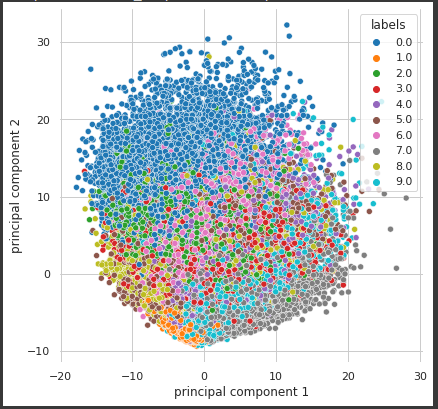

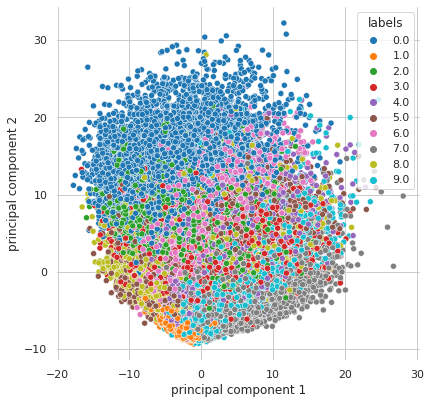

In [30]:
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

# Edit this scatterplot
sns.scatterplot(x="principal component 1", y="principal component 2",
                hue="labels",
                palette="tab10",
                data=df_new, ax=ax)